# Preâmbulo

In [1]:
# Básicas
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

# Dataset

In [2]:
dataset = pd.read_csv('/home/jbrun0r/Documentos/scripts/datasets/auto-mpg.csv')

In [3]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Prelúdio

Text(0.5, 1.0, 'Relação Entre Peso e Autonomia')

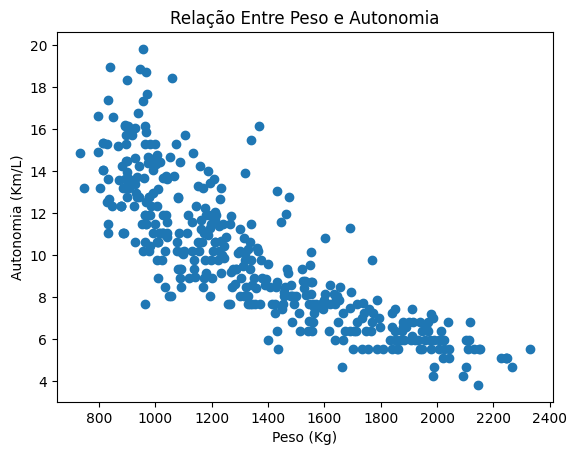

In [28]:
plt.scatter((dataset.weight*0.453592), (dataset.mpg*0.425144))
plt.xlabel('Peso (Kg)')
plt.ylabel('Autonomia (Km/L)')
plt.title('Relação Entre Peso e Autonomia')

# Pré-Processamento

In [40]:
X = dataset[['weight']]
y = dataset[['mpg']]

In [41]:
X = X*0.453592 # Libras       -> Kg
y = y*0.425144 # Milhas/galão -> Km/L

In [42]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weight,398.0,1347.360846,384.120654,731.643896,1008.67521,1271.645172,1636.559936,2331.46288


In [43]:
y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,9.99708,3.322919,3.826296,7.44002,9.778312,12.329176,19.81171


# Normalização

In [44]:
scale = StandardScaler()
scale.fit(X)

X = scale.transform(X)

# Definir: train and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

# Processamento

In [50]:
# Rede Neural --> 1° camada oculta: 10 neuros e 2° camada oculta: 5 neuros
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                    max_iter = 2000,              #interações máxima
                    tol = 0.0000001,              #tolerãncia
                    learning_rate_init = 0.1,     #taxa de aprendizado
                    solver = 'sgd',               #algoritmo de descida do gradiente estocástico
                    activation = 'logistic',
                    learning_rate = 'constant',   #taxa constante
                    verbose = 2
                    )   

In [51]:
rna.fit(X_train, y_train)

Iteration 1, loss = 39.39404389
Iteration 2, loss = 6.69076704
Iteration 3, loss = 7.05929815
Iteration 4, loss = 4.91426932
Iteration 5, loss = 4.40526499
Iteration 6, loss = 3.83004452
Iteration 7, loss = 3.09101463
Iteration 8, loss = 2.35527216
Iteration 9, loss = 1.94590358
Iteration 10, loss = 1.79825962
Iteration 11, loss = 1.76882126
Iteration 12, loss = 1.84749103
Iteration 13, loss = 1.89255628
Iteration 14, loss = 1.92614544
Iteration 15, loss = 1.89570932
Iteration 16, loss = 1.84977180
Iteration 17, loss = 1.81283140
Iteration 18, loss = 1.80847349
Iteration 19, loss = 1.80014195
Iteration 20, loss = 1.82688774
Iteration 21, loss = 1.77928865
Iteration 22, loss = 1.75885039
Iteration 23, loss = 1.74246658
Iteration 24, loss = 1.73556954
Iteration 25, loss = 1.72895356
Iteration 26, loss = 1.73639935
Iteration 27, loss = 1.74717546
Iteration 28, loss = 1.72976201
Iteration 29, loss = 1.70211573
Iteration 30, loss = 1.67796703
Iteration 31, loss = 1.67280642
Iteration 32, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
             verbose=2)

In [52]:
regLinear = SGDRegressor(max_iter = 2000,
                        tol = 0.0000001,
                        eta0 = 0.1,                     #taxa de aprendizagem
                        learning_rate = 'constant',
                        verbose = 2
                        )

In [53]:
regLinear.fit(X_train, y_train)

-- Epoch 1
Norm: 3.46, NNZs: 1, Bias: 10.741710, T: 266, Avg. loss: 3.053211
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 1, Bias: 10.462354, T: 532, Avg. loss: 1.905483
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.06, NNZs: 1, Bias: 9.598649, T: 798, Avg. loss: 1.863580
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 1, Bias: 9.683539, T: 1064, Avg. loss: 1.889937
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.85, NNZs: 1, Bias: 10.559578, T: 1330, Avg. loss: 1.885680
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.86, NNZs: 1, Bias: 9.435079, T: 1596, Avg. loss: 1.906370
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.68, NNZs: 1, Bias: 9.448111, T: 1862, Avg. loss: 1.899424
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.78, NNZs: 1, Bias: 10.211321, T: 2128, Avg. loss: 1.894528
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

# Pós-Processamento

In [56]:
# Predição do conjunto train
y_rna_pred = rna.predict(X_test)
y_rl_pred = regLinear.predict(X_test)

    Calcular R²:

In [57]:
r2_rna = r2_score(y_test, y_rna_pred)
r2_rl = r2_score(y_test, y_rl_pred)

In [58]:
r2_rna

0.7512020512577524

In [59]:
r2_rl

0.7308935210888117

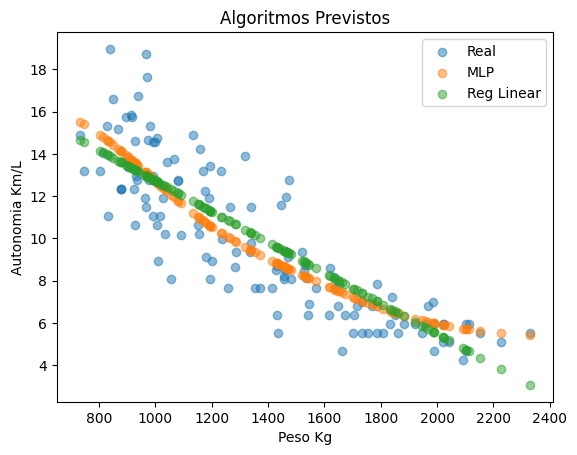

In [60]:
# Desnormatizar
X_test = scale.inverse_transform(X_test)

# Gráfico
plt.scatter(X_test, y_test, alpha=0.5, label='Real')

plt.scatter(X_test, y_rna_pred, alpha=0.5, label='MLP')

plt.scatter(X_test, y_rl_pred, alpha=0.5, label='Reg Linear')

plt.xlabel('Peso Kg')
plt.ylabel('Autonomia Km/L')
plt.title('Algoritmos Previstos')
plt.legend(loc=1)


# Prevendo para um Novo Dado

In [64]:
X_new = np.array([[1250]])
X_new = scale.transform(X_new.T)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
y_rna_new = rna.predict(X_new)

In [66]:
y_reglinear_new = regLinear.predict(X_new)

In [67]:
print('RNA: ',y_rna_new)
print('Reg Linear: ',y_reglinear_new)


RNA:  [10.12766645]
Reg Linear:  [10.91716384]


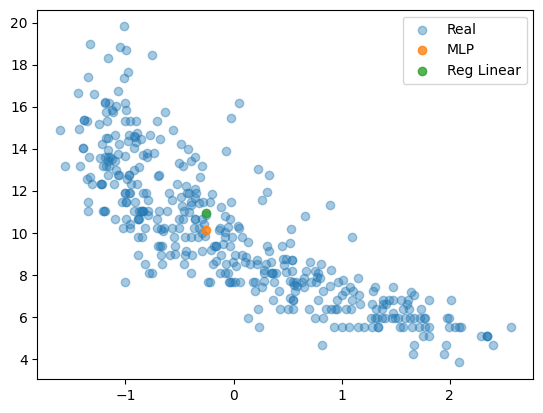

In [80]:
# Gráfico
plt.scatter(X, y, alpha=0.4, label='Real')

plt.scatter(X_new, y_rna_new, alpha=0.8, label='MLP')

plt.scatter(X_new, y_reglinear_new, alpha=0.8, label='Reg Linear')

plt.legend(loc=1)